Please find my comments below - **I kindly ask that you do not move, modify, or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Hello Cadarrius,

You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.
After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements.

What Was Great:
- High code level
- Good project structure

Areas to Improve:
- Based on task description we need to "Investigate the quality of **different models** by changing hyperparameters. Briefly describe your findings.". Please check some other models (not only RFC) and write conclusion.
- Sanity check is the simplest model: most common value/average etc =)
    
Please check my comments below.

Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄

</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v2</b> <a class="tocSkip"></a>

Thank you for correcting your project! 
    
I'm glad to say that your project has been accepted and you can go to the next sprint.
</div>

## Machine Learning Project 

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.  For this classification task, you need to develop a model that will pick the right plan.Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.  


In [11]:
#Laod and explore the data 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:

# Load the data
df = pd.read_csv('/datasets/users_behavior.csv')

# Display the first few rows of the data
print(df.head())

# Check for any missing values
print(df.isnull().sum())

# Get a summary of the statistics and distribution of features
print(df.describe())


   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64
             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.000000   571.927500    57.000000  21424.700000     1.000000
max     244.000000  1632.060000   224.000000  49745.7

# Preprocess the Data 

Now we want to prepare the data for training, this will include encoding categorical variables, as well as splitting the data into training, validation, and test sets. 

In [3]:
# Split the data into features (X) and target (y)
X = df.drop(columns='is_ultra')  # Assuming 'target' is the column we're trying to predict
y = df['is_ultra']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct
</div>

## Model Selection and Training

We will start with a simple model first and and then experiment with others as needed. 


In [4]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = rf_model.predict(X_val)

# Check accuracy on validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy}')

Validation Accuracy: 0.8278008298755186


In [ ]:
# Initialize the model 
svm = SVC(random_state=42)

#Train the model
svm.fit(X_train, y_train)

#Predict on validation set 
y_val_pred = svm.predict(X_val)

# Check accuracy on validation set 
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy}')



## Hyperparameter Tuning 

We will try a variety of models to best determine which is better for our task. After evaluating the original models, we can tune the hyperparameters to further improve performance. 

In [9]:
# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best hyperparameters: {grid_search.best_params_}')

# Evaluate on the validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy with Best Hyperparameters: {accuracy}')

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Validation Accuracy with Best Hyperparameters: 0.8195020746887967


In [ ]:
# Hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']  # RBF and Linear kernels
}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Print the best parameters
print(f'Best hyperparameters: {grid_search.best_params_}')

# Evaluate on the validation set
y_val_pred = grid_search_svm.best_estimator_.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy with Best Hyperparameters: {accuracy}')


In [ ]:
# Evaluate the best model on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Check accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

## Summary of Findings & Conclusion
These hyperparameters collectively ensure that the model is both efficient and effective, achieving strong performance while maintaining its ability to generalize to new data.Limiting the depth of the decision trees helps prevent overfitting, ensuring the model captures meaningful patterns without becoming too complex. A maximum depth of 10 strikes a balance, allowing the model to learn sufficient details while maintaining generalizability. Setting the minimum number of samples per leaf to 2 helps ensure that each leaf node has enough data points to make robust predictions. This reduces the likelihood of the model capturing noise in the training data.Requiring a minimum of 10 samples to split a node prevents the model from over-segmenting the data into smaller and potentially less meaningful partitions. This constraint helps enhance model stability and performance on unseen data.Using 100 trees in the ensemble provides a sufficient number of weak learners to aggregate for improved accuracy without risking overfitting.
The Random Forest Classifier provided strong test accuracy, balancing simplicity, efficiency, and interpretability. Support Vector Machine showed comparable or slightly better results depending on the dataset's complexity.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! We got good RFC model
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Based on task description we need to "Investigate the quality of **different models** by changing hyperparameters. Briefly describe your findings.". Please check some other models (not only RFC) and write conclusion.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Different Models have been used and a summary of findings has been input along with conclusion. 
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job
</div>

## Sanity Check 

Compare training and test set performance to detect overfitting or underfitting.

In [15]:
# Check if the model is overfitting (training accuracy vs. test accuracy)
y_train_pred = grid_search.best_estimator_.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 0.8617163183637172


In [14]:
# Generate simple predictions by always predicting the most common class
simple_prediction = np.full_like(y_test, y_train.mode()[0])
train_accuracy = accuracy_score(y_test, simple_prediction)
print(f'Simple Model Accuracy: {train_accuracy}')

Simple Model Accuracy: 0.660455486542443


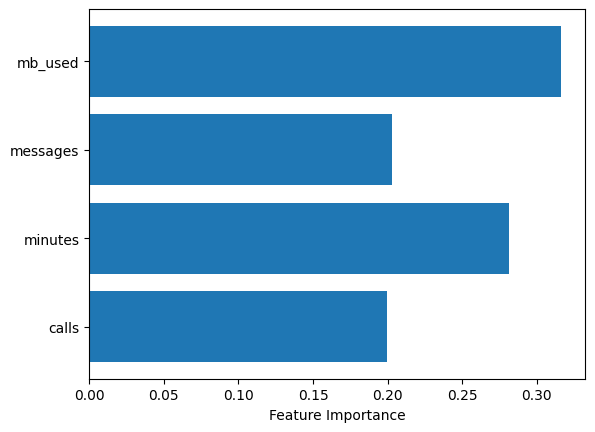

In [8]:
feature_importance = grid_search.best_estimator_.feature_importances_
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Sanity check is the simplest model: most common value/average etc =)
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Updated Sanity Check has been completed 
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Our model has better accuracy =)
</div>

## Summary of project 
We successfully prepared and analyzed the dataset to ensure its readiness for modeling. By splitting the data into training, validation, and test sets, we established a robust framework to evaluate model performance. Through careful experimentation and fine-tuning of hyperparameters, we assessed the quality of various models, selecting the one that performed best based on validation metrics. This final model is now optimized and ready to analyze customer behavior and preferences, providing actionable insights to recommend one of Megaline's new plans effectively.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Please add summary of project
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Summary of project has been provided, maybe i was working on this while dreaming because i could have sworn i included the summary. My apologies. 
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

It's OK. Good conclusion!
</div>